In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Линейная регрессия

In [3]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1,
                                             noise=5., coef=True, random_state=2)

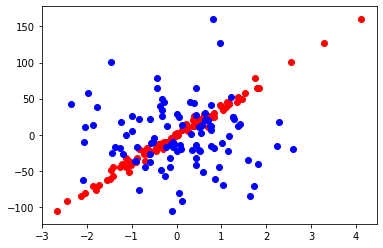

In [8]:
pylab.scatter(data[:, 0], target, color='r')
pylab.scatter(data[:, 1], target, color='b')

In [11]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target, test_size=0.3)

## LinearRegression

In [13]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [14]:
test_labels

array([  5.86887774,  41.95683853, -18.86438755,  29.8208999 ,
       -10.27758354,  28.15553021,  78.24817537, -26.87743177,
       -18.57607726,  12.42286854,  24.47584129, -45.38589148,
        27.83791274, -12.0017312 , -70.11132234, -37.31870104,
       -15.01435792, -22.33224966,  25.7124082 ,  38.36241814,
        23.87701013, -42.44469577,  13.02656201, -22.32195021,
        25.24428409, -32.92158843,  -1.42235396, -24.77820218,
        13.31981235, -19.36956003])

In [15]:
predictions

array([  4.20789252,  42.51303536, -19.53466816,  31.02484609,
        -8.24425536,  21.98155853,  65.24241692, -28.73816085,
       -25.4332608 ,   6.21671413,  22.38088433, -44.64396163,
        22.54234347,  -7.40211244, -66.71253698, -35.72466837,
       -10.00774618, -29.50332999,  27.17203888,  40.37538043,
        31.18402679, -39.70728852,  18.09723053, -22.99380346,
        13.98410111, -34.56397203,  -1.05406846, -27.62381914,
        13.91081355, -32.56069255])

In [16]:
metrics.mean_absolute_error(test_labels, predictions)

3.9763086826646665

In [18]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring='neg_mean_absolute_error',
                                                cv=10)
print('mean: {}, str: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779696, str: 1.07371044928902


In [19]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [21]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779696, std: 1.07371044928902


In [22]:
coef

array([38.07925837,  0.        ])

In [23]:
linear_regressor.coef_

array([38.15647923,  0.55154788])

In [24]:
linear_regressor.intercept_

-0.9721855036488483

In [27]:
print("y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.intercept_,
                                                 linear_regressor.coef_[0],
                                                 linear_regressor.coef_[1]))

y = -0.97 + 38.16*x1 + 0.55*x2


## Lasso

In [28]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [32]:
metrics.mean_absolute_error(lasso_predictions, test_labels)

3.942528970672554

In [33]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring=scorer, cv=10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [35]:
lasso_regressor.coef_

array([37.49675739,  0.        ])

In [42]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [43]:
print('y= {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(lasso_regressor.intercept_,
                                             lasso_regressor.coef_[0],
                                             lasso_regressor.coef_[1]))

y= -0.96 + 37.50*x1 + 0.00*x2
